In [0]:
!pip install numpy scipy scikit-learn pillow h5py

In [0]:
# loading the dataset
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
type(x_train)

numpy.ndarray

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [0]:
# Reshaping the numpy array into an image format
def pre_process_images(x_train,y_train,x_test,y_test):
  image_height,image_width = 28,28
  x_train = x_train.reshape(x_train.shape[0], image_height, image_width, 1)
  x_test = x_test.reshape(x_test.shape[0], image_height, image_width, 1)
  input_shape = (image_height, image_width, 1)
  no_classes = 10
  # changing to float
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  #scaling to [0,1]
  x_train /= 255
  x_test /= 255
  # category encoding
  y_train = tf.keras.utils.to_categorical(y_train, no_classes)
  y_test = tf.keras.utils.to_categorical(y_test, no_classes)
  print("Pre_processing_done")
  return x_train,y_train,x_test,y_test

In [0]:
input_shape

(28, 28, 1)

In [0]:
y_train.shape

(60000, 10)

In [0]:
def simple_cnn(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=input_shape
    ))
    model.add(tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(rate=0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=1024, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.3))
    model.add(tf.keras.layers.Dense(units=no_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])
    return model



In [0]:
def train_model():
  epochs = 2
  batch_size = 64
  input_shape = (28,28,1)
  simple_cnn_model = simple_cnn(input_shape)
  simple_cnn_model.fit(x_train, y_train, batch_size, epochs, (x_test, y_test))
  train_loss, train_accuracy = simple_cnn_model.evaluate(
      x_train, y_train, verbose=0)
  print('Train data loss:', train_loss)
  print('Train data accuracy:', train_accuracy)

In [0]:
def test_model(x_test,y_test):
  test_loss, test_accuracy = simple_cnn_model.evaluate(
    x_test, y_test, verbose=0)
  print('Test data loss:', test_loss)
  print('Test data accuracy:', test_accuracy)

In [0]:
#Let's train our cnn on fashion mnist
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
y_train.shape

(60000,)

In [0]:
x_train,y_train,x_test,y_test = pre_process_images(x_train,y_train,x_test,y_test)

Pre_processing_done


In [0]:
x_test.shape

(10000, 28, 28, 1)

In [0]:
train_model()

Train on 60000 samples
Epoch 1/2
Epoch 2/2
Train data loss: 0.15943638891180356
Train data accuracy: 0.9422333


In [0]:
test_model(x_test,y_test)

Test data loss: 4.849679325866699
Test data accuracy: 0.0562


In [0]:
 epochs = 4
batch_size = 64
input_shape = (28,28,1)
simple_cnn_model = simple_cnn(input_shape)
simple_cnn_model.fit(x_train, y_train, batch_size, epochs, (x_test, y_test))
train_loss, train_accuracy = simple_cnn_model.evaluate(
    x_train, y_train, verbose=0)
print('Train data loss:', train_loss)
print('Train data accuracy:', train_accuracy)

Train on 60000 samples
Epoch 1/4
Epoch 2/4
Epoch 3/4
Epoch 4/4
Train data loss: 0.09632884859616558
Train data accuracy: 0.96495


In [0]:
test_loss, test_accuracy = simple_cnn_model.evaluate(
  x_test, y_test, verbose=0)
print('Test data loss:', test_loss)
print('Test data accuracy:', test_accuracy)

Test data loss: 0.23022527009993793
Test data accuracy: 0.9182


In [0]:
#bring data from kaggle
!pip install kaggle

In [0]:
!pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


#### Dont' forget to join the competition or click on I understand button in kaggle before downlaoding the dataset

In [0]:
!kaggle competitions download -c dogs-vs-cats

 95% 257M/271M [00:02<00:00, 97.2MB/s]
100% 271M/271M [00:02<00:00, 117MB/s] 
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 86.2MB/s]
 97% 527M/543M [00:04<00:00, 138MB/s]
100% 543M/543M [00:05<00:00, 110MB/s]


In [0]:
!dir

sample_data  sampleSubmission.csv  test1.zip  train.zip


In [0]:
!unzip train.zip
!unzip test1.zip

In [0]:
import os
import shutil
work_dir = '/content' # give your correct directory
image_names = sorted(os.listdir(os.path.join(work_dir, 'train')))


def copy_files(prefix_str, range_start, range_end, target_dir):
    image_paths = [os.path.join(work_dir, 'train', prefix_str + '.' + str(i) + '.jpg')
                   for i in range(range_start, range_end)]
    dest_dir = os.path.join(work_dir, 'new_data', target_dir, prefix_str)
    os.makedirs(dest_dir)
    for image_path in image_paths:
        shutil.copy(image_path, dest_dir)


copy_files('dog', 0, 1000, 'train')
copy_files('cat', 0, 1000, 'train')
copy_files('dog', 1000, 1400, 'test')
copy_files('cat', 1000, 1400, 'test')

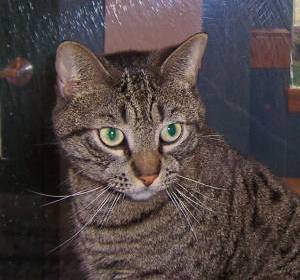

In [0]:
from IPython.display import Image
Image("/content/new_data/train/cat/cat.1.jpg")

In [0]:
#Benchmarking with simple CNN
import os
work_dir = "/content/data"
image_height, image_width = 150, 150
train_dir = os.path.join(work_dir,'train')
test_dir = os.path.join(work_dir, 'test')
no_classes = 2
no_validation = 800
epochs = 2
batch_size = 5
no_train = 2000
no_test = 800
input_shape = (image_height, image_width, 3)
epoch_steps = no_train // batch_size
test_steps = no_test // batch_size

In [0]:
#fancy way of reading image files and it only loads data in batches so memory efficient too.
# important note here is that generatore class expects your folder structure to be in a certain way
# data should be present in subfolders of individual class e.g train/dog , train/cat ,test/dog, test/cat
import tensorflow as tf
generator_train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)
generator_test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)


train_images = generator_train.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(image_width, image_height))

test_images = generator_test.flow_from_directory(
    test_dir,
    batch_size=batch_size,
    target_size=(image_width, image_height))

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [0]:
def simple_cnn(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=input_shape
    ))
    model.add(tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(rate=0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=1024, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.3))
    model.add(tf.keras.layers.Dense(units=no_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])
    return model

simple_cnn_model = simple_cnn(input_shape)

simple_cnn_model.fit_generator(
    train_images,
    steps_per_epoch=epoch_steps,
    epochs=epochs,
    validation_data=test_images,
    validation_steps=test_steps)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch 1/2
400/400 [==============================] - 1300s 3s/step - loss: 0.8796 - acc: 0.4905 - val_loss: 0.6932 - val_acc: 0.4988
Epoch 2/2
400/400 [==============================] - 1272s 3s/step - loss: 0.6996 - acc: 0.5215 - val_loss: 0.7028 - val_acc: 0.4963


In [0]:
#Let's try with bigger batch size
work_dir = "/content/data"
image_height, image_width = 150, 150
train_dir = os.path.join(work_dir,'train')
test_dir = os.path.join(work_dir, 'test')
no_classes = 2
no_validation = 800
epochs = 2
batch_size = 200
no_train = 2000
no_test = 800
input_shape = (image_height, image_width, 3)
epoch_steps = no_train // batch_size
test_steps = no_test // batch_size

#***************************************************
import tensorflow as tf
generator_train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)
generator_test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)


train_images = generator_train.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(image_width, image_height))

test_images = generator_test.flow_from_directory(
    test_dir,
    batch_size=batch_size,
    target_size=(image_width, image_height))

#**************************************************

simple_cnn_model.fit_generator(
    train_images,
    steps_per_epoch=epoch_steps,
    epochs=epochs,
    validation_data=test_images,
    validation_steps=test_steps)


Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/2
10/10 [==============================] - 83s 8s/step - loss: 0.4972 - acc: 0.7285 - val_loss: 0.9140 - val_acc: 0.5550
Epoch 2/2
10/10 [==============================] - 81s 8s/step - loss: 0.4308 - acc: 0.7800 - val_loss: 0.9768 - val_acc: 0.5512


In [0]:
#Trained on 3 different bacth sizes : 10 ,100, 200 and the best val_accuracy achieved is 55% which is not great. May be we can improve this by adding more data or by making more complex network 
# but let's say we don't have much data and no knowledge on making more complex networks. Transfer learning comes to rescue.

In [0]:
#Data Augmentation is one of the technique to improve dataset size let's see if data augmentation helps.
generator_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    horizontal_flip=True,
    zoom_range=0.3,
    shear_range=0.3,)
generator_test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)
#*************************************************
train_images = generator_train.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(image_width, image_height))

test_images = generator_test.flow_from_directory(
    test_dir,
    batch_size=batch_size,
    target_size=(image_width, image_height))

#**************************************************

simple_cnn_model.fit_generator(
    train_images,
    steps_per_epoch=epoch_steps,
    epochs=epochs,
    validation_data=test_images,
    validation_steps=test_steps)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/2
10/10 [==============================] - 83s 8s/step - loss: 0.7759 - acc: 0.5440 - val_loss: 0.7241 - val_acc: 0.5562
Epoch 2/2
10/10 [==============================] - 80s 8s/step - loss: 0.6965 - acc: 0.5220 - val_loss: 0.7061 - val_acc: 0.5312


In [0]:
# not much improvement!

In [0]:
# Method used below: pass training and testing data to vgg network and extract the output and store is as bottle neck features
# Use these bottle neck features as input and train a FCNN 
import numpy as np
import os
import tensorflow as tf

work_dir = '/content/new_data'

image_height, image_width = 150, 150
train_dir = os.path.join(work_dir, 'train')
test_dir = os.path.join(work_dir, 'test')
no_classes = 2
no_validation = 800
epochs = 50
batch_size = 50
no_train = 2000
no_test = 800
input_shape = (image_height, image_width, 3)
epoch_steps = no_train // batch_size
test_steps = no_test // batch_size

generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

model = tf.keras.applications.VGG16(include_top=False)

train_images = generator.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(image_width, image_height),
    class_mode=None,
    shuffle=False
)

train_bottleneck_features = model.predict_generator(train_images, epoch_steps)
print(len(train_bottleneck_features))
test_images = generator.flow_from_directory(
    test_dir,
    batch_size=batch_size,
    target_size=(image_width, image_height),
    class_mode=None,
    shuffle=False
)

test_bottleneck_features = model.predict_generator(test_images, test_steps)
#print(test_bottleneck_features)
train_labels = np.array([0] * int(no_train / 2) + [1] * int(no_train / 2))
test_labels = np.array([0] * int(no_test / 2) + [1] * int(no_test / 2))

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=train_bottleneck_features.shape[1:]))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(
    train_bottleneck_features,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(test_bottleneck_features, test_labels))

model.save_weights("/content/top_model.h5")
print("Saved model to disk")

Found 2000 images belonging to 2 classes.
2000
Found 800 images belonging to 2 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2000 samples, validate on 800 samples
Epoch 1/50
2000/2000 [==============================] - 2s 777us/sample - loss: 1.8688 - acc: 0.7005 - val_loss: 0.4713 - val_acc: 0.8037
Epoch 2/50
2000/2000 [==============================] - 1s 563us/sample - loss: 0.5174 - acc: 0.8075 - val_loss: 0.2918 - val_acc: 0.8825
Epoch 3/50
2000/2000 [==============================] - 1s 575us/sample - loss: 0.3794 - acc: 0.8410 - val_loss: 0.8285 - val_acc: 0.7188
Epoch 4/50
2000/2000 [==============================] - 1s 542us/sample - loss: 0.3394 - acc: 0.8525 - val_loss: 0.2436 - val_acc: 0.9013
Epoch 5/50
2000/2000 [==============================] - 1s 529us/sample - loss: 0.2541 - acc: 0.8980 - val_loss: 0.3642 - val_acc: 0.8587
Epoch 6/50
2000/2000 [==============================] - 1s 549us/sample - loss: 0

In [0]:
# It was giving more than 90% accuracy caompared with our base model accuracy it is very good.

In [0]:
# Method use previous is suitable if you have small dataset but the catch is it may lead to overfitting 
# Method we are going to use now is to combine vgg with fc and train only the last layers freezing the previous layers of the entire network.
import tensorflow as tf
input_tensor = tf.keras.layers.Input(shape=(150,150,3))
prev_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor)
print('Model loaded.')
prev_model.summary()


Model loaded.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128

In [0]:
#vgg16 has 19 layers

In [0]:
len(prev_model.layers)

19

In [0]:
prev_model.layers

In [0]:
# build a classifier model to put on top of the convolutional model
top_model = tf.keras.models.Sequential()
top_model.add(tf.keras.layers.Flatten(input_shape = prev_model.output_shape[1:]))
top_model.add(tf.keras.layers.Dense(1024, activation='relu'))
top_model.add(tf.keras.layers.Dropout(0.3))
top_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
top_model.load_weights('/content/top_model.h5')
top_model.summary()
top_model.layers
len(top_model.layers)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 8,390,657
Trainable params: 8,390,657
Non-trainable params: 0
_________________________________________________________________


4

In [0]:
#concatenating vgg16 with our custom fcnn

new_model = tf.keras.models.Sequential()
for l in prev_model.layers:
    new_model.add(l)

new_model.add(top_model)

print(new_model.layers)
new_model.summary()
print(len(new_model.layers))


[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe0c60fc1d0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe0c5fdec50>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fe0c600e0b8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe0c4794ba8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe0c479ca90>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fe0c47ad0f0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe0c47ad128>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe0c47babe0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe0c47cd240>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fe0c4759860>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe0c4759898>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe0c476d3c8>, <tensorflow.python.keras.layers.convolu

In [0]:
new_model.layers

In [0]:
#idea here is to train the last convolutional block and customm fcnn
# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in new_model.layers[:14]:
    layer.trainable = False
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
new_model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
#setting some parameters

work_dir = '/content/new_data'

img_height, img_width = 150, 150
train_dir = os.path.join(work_dir, 'train')
test_dir = os.path.join(work_dir, 'test')
no_classes = 2
no_validation = 800
epochs = 50
batch_size = 50
no_train = 2000
no_test = 800
input_shape = (img_height, img_width, 3)
epoch_steps = no_train // batch_size
test_steps = no_test // batch_size


#train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)
# prepare data augmentation configuration
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# fine-tune the model
new_model.fit_generator(
    train_generator,
    steps_per_epoch=epoch_steps,
    epochs=epochs,
    validation_data= test_generator,
    validation_steps=test_steps) 

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/50
40/40 [==============================] - 49s 1s/step - loss: 5.1392 - acc: 0.5020 - val_loss: 0.6928 - val_acc: 0.5200
Epoch 2/50
40/40 [==============================] - 47s 1s/step - loss: 0.6837 - acc: 0.5510 - val_loss: 0.6769 - val_acc: 0.5800
Epoch 3/50
40/40 [==============================] - 48s 1s/step - loss: 0.6704 - acc: 0.5920 - val_loss: 0.6619 - val_acc: 0.6300
Epoch 4/50
40/40 [==============================] - 48s 1s/step - loss: 0.6515 - acc: 0.6220 - val_loss: 0.6414 - val_acc: 0.6700
Epoch 5/50
40/40 [==============================] - 48s 1s/step - loss: 0.6402 - acc: 0.6495 - val_loss: 0.6210 - val_acc: 0.7088
Epoch 6/50
40/40 [==============================] - 48s 1s/step - loss: 0.6215 - acc: 0.6745 - val_loss: 0.5996 - val_acc: 0.7437
Epoch 7/50
40/40 [==============================] - 48s 1s/step - loss: 0.6045 - acc: 0.6940 - val_loss: 0.5792 - val_acc: 0.7325
Epoch 8

In [0]:
# as we can see the validation accuracy improved a bit by using this method of training.
#This approach works better when the given problem is very different from the images that the model is trained upon

In [0]:
# Data Size	    Similar Dataset	            Different Dataset
# Smaller data	Fine-tune the output layers	Fine-tune the deeper layer
# Bigger data	  Fine-tune the whole model	  Train from scratch